In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2


In [24]:
BASE_PATH = '/kaggle/input/multi-model-for-mosquito-my-fyp/VisText-Mosquito A Multimodal Dataset for Mosquito'

CSV_PATH = os.path.join(BASE_PATH, 'image_discription.csv')
BREEDING_IMAGES_PATH = os.path.join(BASE_PATH, 'Breeding Place Detection', 'train', 'images')


In [25]:
df = pd.read_csv(CSV_PATH)
df.head()


,filename,Question,Response,Reasoning
0,1-2-_jpg.rf.755775e343a38a5816158f2cd0acf15e.jpg,Does the image show a potential mosquito breed...,Yes,The image contains tires submerged in water. D...
1,1-2-_jpg.rf.d165581a933c5b89485547ca00dd5360.jpg,Does this image contain any objects or areas l...,Yes,The image shows old tires partially submerged ...
2,1-2-_jpg.rf.f6f585332e8d2f96d40eba243669f908.jpg,Does the image show a potential site for mosqu...,Yes,The image contains tires partially submerged i...
3,1726484413702_jpg.rf.7fad42862fea19211aff69e8c...,Does this image depict a potential mosquito br...,Yes,The image shows a storm drain filled with stag...
4,1726484413702_jpg.rf.ee84fec8843a83ea175261ea0...,Does the image show a potential mosquito breed...,Yes,The image shows a stagnant water collection po...


In [26]:
df.info()
print("\nNull values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filename   3762 non-null   object
 1   Question   3762 non-null   object
 2   Response   3762 non-null   object
 3   Reasoning  3762 non-null   object
dtypes: object(4)
memory usage: 117.7+ KB

Null values:
 filename     0
Question     0
Response     0
Reasoning    0
dtype: int64


/tmp/ipykernel_36/1777677854.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


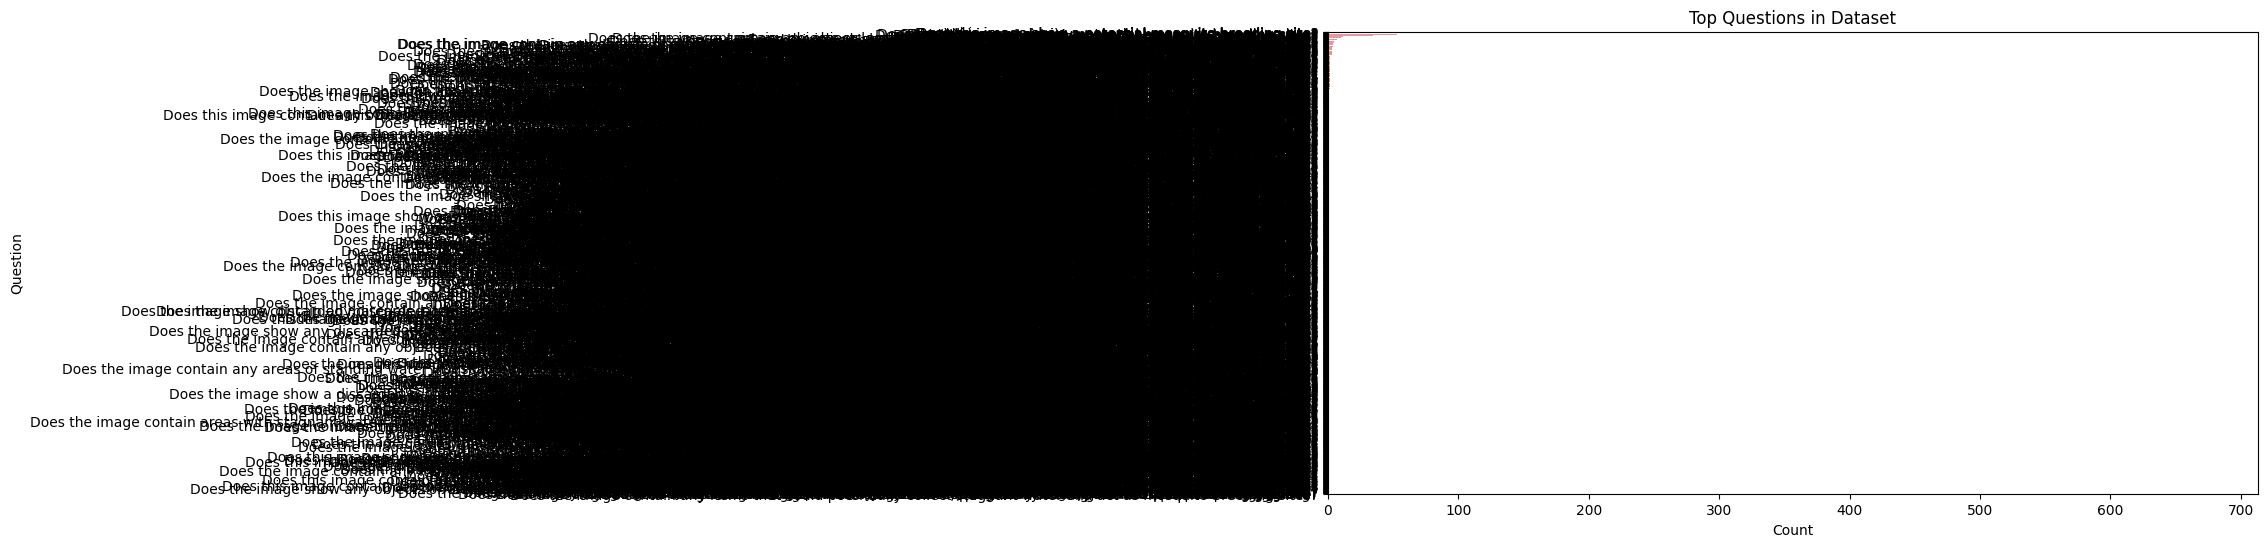

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Question'], order=df['Question'].value_counts().index)
plt.title("Top Questions in Dataset")
plt.xlabel("Count")
plt.ylabel("Question")
plt.tight_layout()
plt.show()


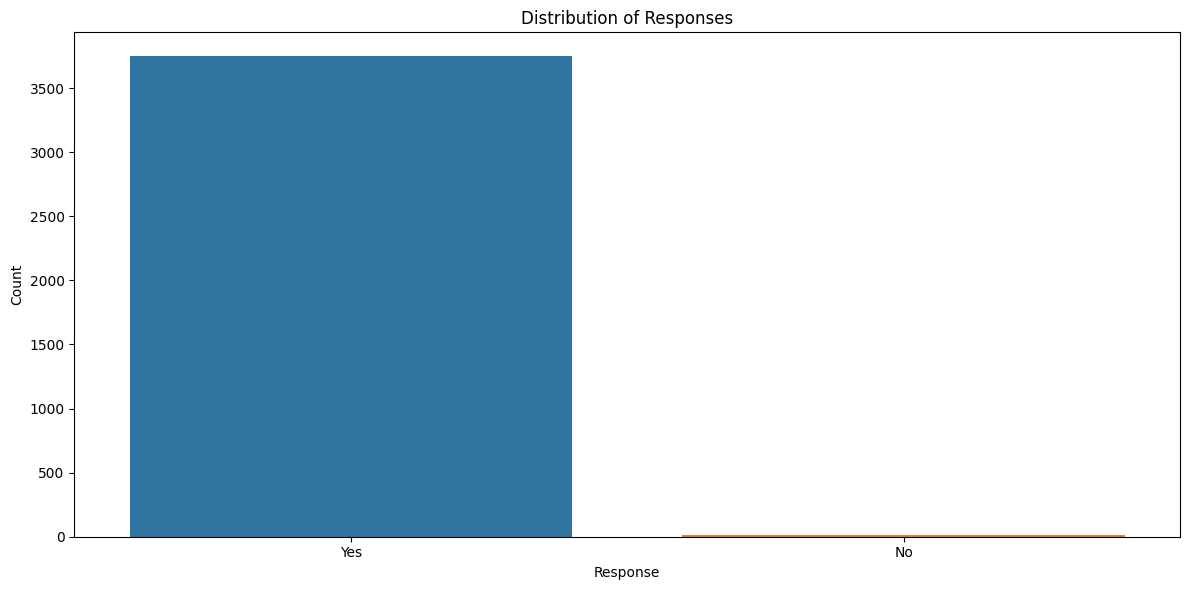

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Response'], order=df['Response'].value_counts().index)
plt.title("Distribution of Responses")
plt.xlabel("Response")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


/tmp/ipykernel_36/3640319814.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


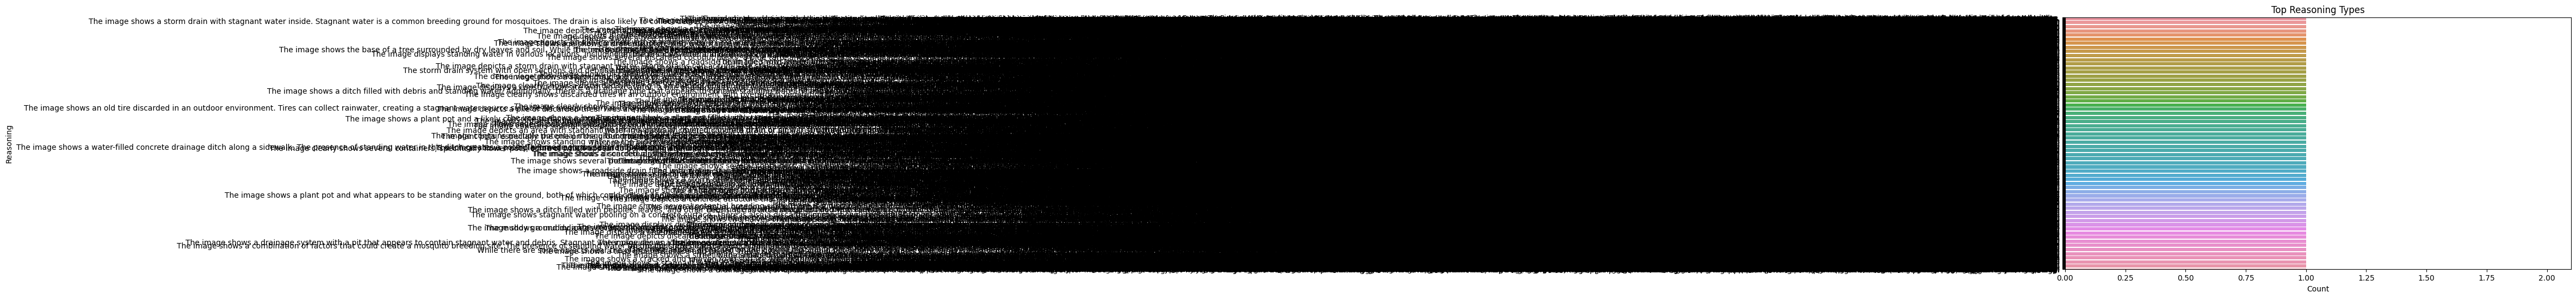

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Reasoning'], order=df['Reasoning'].value_counts().index)
plt.title("Top Reasoning Types")
plt.xlabel("Count")
plt.ylabel("Reasoning")
plt.tight_layout()
plt.show()

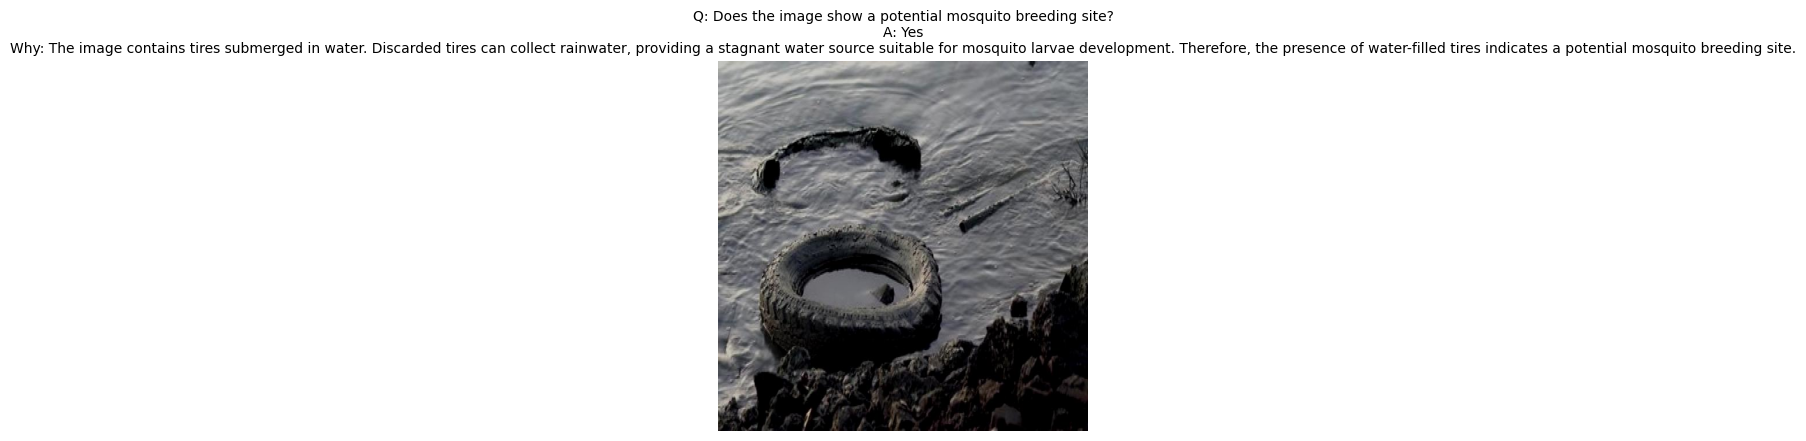

In [30]:
sample_row = df.iloc[0]
img_path = os.path.join(BREEDING_IMAGES_PATH, sample_row['filename'])

image = cv2.imread(img_path)
if image is not None:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Q: {sample_row['Question']}\nA: {sample_row['Response']}\nWhy: {sample_row['Reasoning']}", fontsize=10)
    plt.show()
else:
    print("Image not found:", sample_row['filename'])


In [32]:
def show_samples(n=5):
    for i in range(n):
        row = df.iloc[i]
        img_path = os.path.join(BREEDING_IMAGES_PATH, row['filename'])
        image = cv2.imread(img_path)
        if image is None:
            print(f"Image not found: {row['filename']}")
            continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Q: {row['Question']}\nA: {row['Response']}\nWhy: {row['Reasoning']}", fontsize=10)
        plt.show()


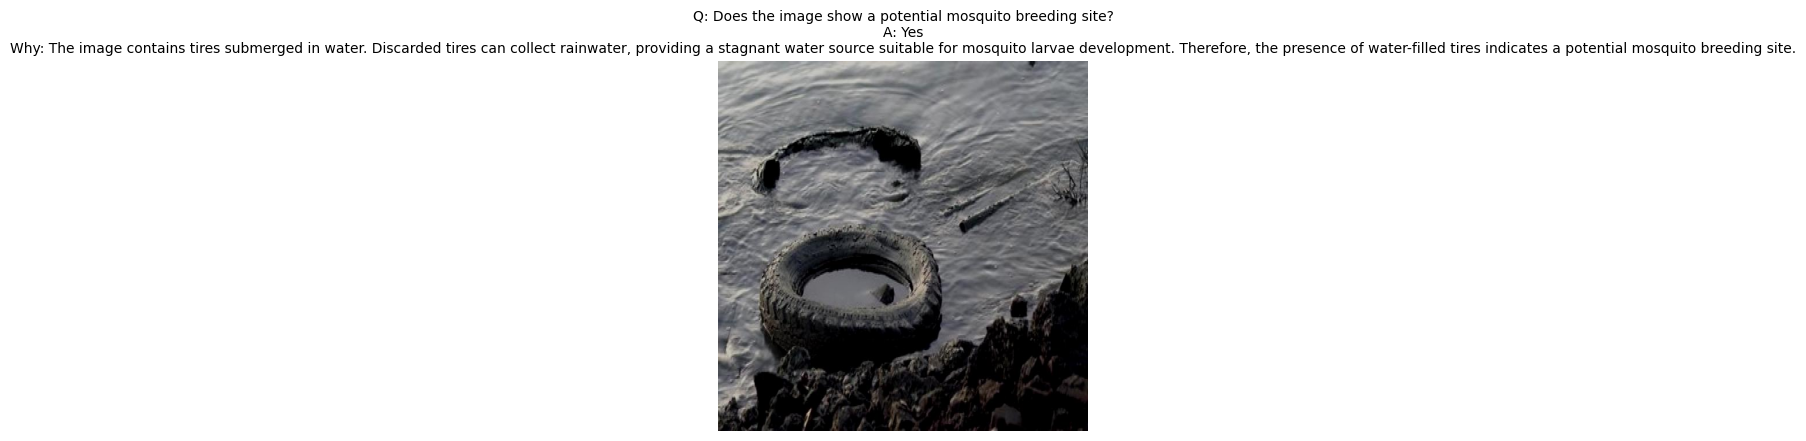

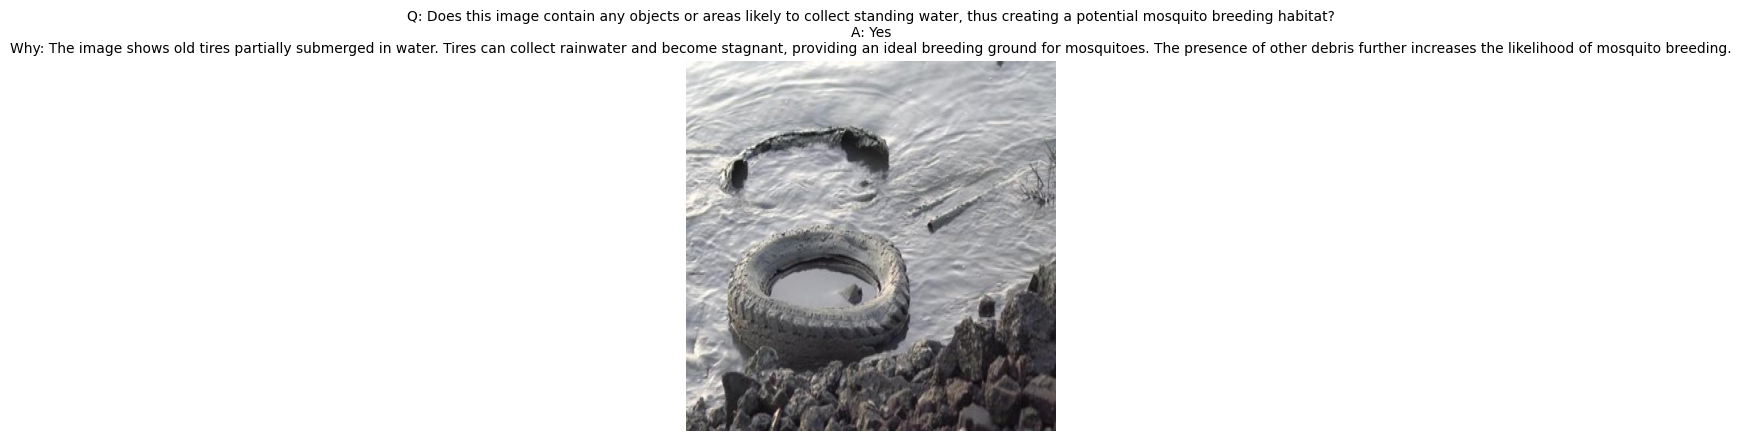

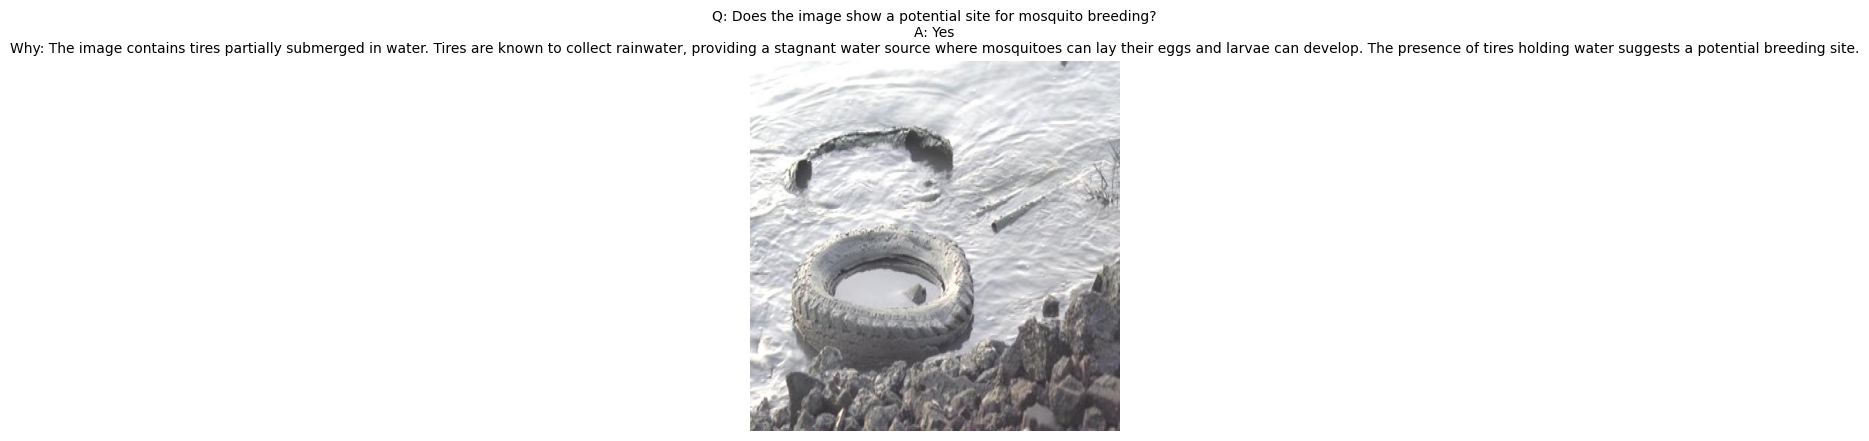

In [33]:
show_samples(3)